## Подготовка данных

### Загрузим и изучим данные

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Определяем константу для random_state
RANDOM_STATE = 12345

In [2]:
# Путь к файлам
train_path = '/datasets/gold_industry_train.csv'
test_path = '/datasets/gold_industry_test.csv'
full_path = '/datasets/gold_industry_full.csv'

In [3]:
# Функции для загрузки и просмотра данных
def load_data(file_path):
    """
    Загружает данные из CSV-файла в DataFrame.
    
    :param file_path: путь к CSV-файлу
    :return: DataFrame с загруженными данными
    """
    return pd.read_csv(file_path)

In [4]:
def display_data(df, n=5):
    """
    Выводит первые строки DataFrame, общую информацию о нем, а также информацию о пропусках и дубликатах.
    
    :param df: DataFrame для отображения
    :param df_name: Имя DataFrame для отображения в заголовке
    :param n: количество строк для отображения (по умолчанию 5)
    """
    print("\n" + "="*50 + "\n")
    print("\nПервые строки DataFrame:")
    display(df.head(n))
    
    print("\nОбщая информация о DataFrame:\n")
    df.info()
    
    print("\nСтатистические показатели:\n")
    display(df.describe())
    
    print("\nКоличество пропусков:", df.isnull().sum().sum())
    print("\nКоличество дубликатов:", df.duplicated().sum())
    print()
    print("\n" + "="*50 + "\n")

In [5]:
# Загрузим данные
train_data = load_data(train_path)
test_data = load_data(test_path)
full_data = load_data(full_path)

In [6]:
# Посмотрим тренировочный датасет
display_data(train_data)




Первые строки DataFrame:


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686



Общая информация о DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate          

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730



Количество пропусков: 3050

Количество дубликатов: 0





In [7]:
# Посмотрим тестовый датасет
display_data(test_data)




Первые строки DataFrame:


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805



Общая информация о DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459



Количество пропусков: 375

Количество дубликатов: 0





In [8]:
# Посмотрим исходную выборку
display_data(full_data)




Первые строки DataFrame:


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686



Общая информация о DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate          

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730



Количество пропусков: 4481

Количество дубликатов: 0





**Описание данных:**

**Технологический процесс:**

- **Rougher feed** — исходное сырье
- **Rougher additions (или reagent additions)** — флотационные реагенты:
  - **Xanthate** — ксантогенат (промотер, или активатор флотации)
  - **Sulphate** — сульфат (на данном производстве сульфид натрия)
  - **Depressant** — депрессант (силикат натрия)
- **Rougher process** (англ. «грубый процесс») — флотация
- **Rougher tails** — отвальные хвосты
- **Float banks** — флотационная установка
- **Cleaner process** — очистка
- **Rougher Au** — черновой концентрат золота
- **Final Au** — финальный концентрат золота

**Параметры этапов:**

- **air amount** — объём воздуха
- **fluid levels** — уровень жидкости
- **feed size** — размер гранул сырья
- **feed rate** — скорость подачи

**Наименование признаков:**

Наименование признаков должно быть такое: `[этап].[тип_параметра].[название_параметра]`

**Пример:**
- `rougher.input.feed_ag`

**Возможные значения для блока `[этап]`:**
- **rougher** — флотация
- **primary_cleaner** — первичная очистка
- **secondary_cleaner** — вторичная очистка
- **final** — финальные характеристики

**Возможные значения для блока `[тип_параметра]`:**
- **input** — параметры сырья
- **output** — параметры продукта
- **state** — параметры, характеризующие текущее состояние этапа
- **calculation** — расчётные характеристики

### Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдём MAE между нашим расчётом и значением признака. Далее сделаем выводы.

Признак `rougher.output.recovery` представляет собой показатель эффективности процесса обогащения золота на этапе "грубого" флотационного обогащения (rougher stage). Этот показатель рассчитывает, какой процент золота удалось извлечь из сырья на данном этапе обогащения.

Эффективность обогащения рассчитывается по следующей формуле:


$$
\text{Recovery} = \frac{C \times (F - T)}{F \times (C - T)} \times 100\%
$$

где:
- **C** — доля золота в концентрате после флотации/очистки (rougher.output.concentrate_au);
- **F** — доля золота в исходном сырье/концентрате до флотации/очистки (rougher.input.feed_au);
- **T** — доля золота в хвостах после флотации/очистки (rougher.output.tail_au).

Таким образом, `rougher.output.recovery` измеряет эффективность извлечения золота на этапе грубой флотации, выраженную в процентах.

In [9]:
# Извлечение необходимых данных
C = train_data['rougher.output.concentrate_au']
F = train_data['rougher.input.feed_au']
T = train_data['rougher.output.tail_au']

# Вычисление эффективности обогащения по формуле
calculated_recovery = (C * (F - T)) / (F * (C - T)) * 100

# Настоящие значения эффективности обогащения
true_recovery = train_data['rougher.output.recovery']

# Вычисление MAE
mae = mean_absolute_error(true_recovery, calculated_recovery)

# Вывод
print(f'Среднее значение эффективности обогащения, вычисленное с помощью формулы: {calculated_recovery.mean()}')
print(f'Фактическое среднее значение эффективности обогащения: {true_recovery.mean()}')
print(f'MAE между рассчитанными и фактическими значениями эффективности обогащения: {mae}')

Среднее значение эффективности обогащения, вычисленное с помощью формулы: 82.52119968211336
Фактическое среднее значение эффективности обогащения: 82.52119968211336
MAE между рассчитанными и фактическими значениями эффективности обогащения: 9.83758577644259e-15


Эффективность обогащения, или recovery, измеряется в процентах (%). Это показатель того, какой процент золота удалось извлечь из исходного сырья на данном этапе обогащения. 

Число 82.52 означает, что в среднем 82.52% золота было извлечено из исходного материала на этапе грубой флотации (rougher stage).

Выводы:
- **Среднее значение эффективности обогащения, вычисленное с помощью формулы: 82.52**. Это значение показывает, что в среднем 82.52% золота удалось извлечь из исходного сырья.
- **Фактическое среднее значение эффективности обогащения: 82.52**. Это значение показывает, что в среднем 82.52% золота удалось извлечь из исходного сырья по фактическим данным, представленным в наборе данных.
- **MAE между рассчитанными и фактическими значениями эффективности обогащения:** близка к нулю, это указывает на крайне незначительные расхождения между рассчитанными и фактическими значениями, которые могут быть вызваны машинными ошибками при вычислениях с плавающей запятой.

Таким образом, расчеты и данные полностью согласуются, что подтверждается MAE практически равным нулю. Это говорит о том, что формула для расчета эффективности обогащения применена правильно и данные в наборе данных корректны.

### Проанализируем признаки, недоступные в тестовой выборке. Проверим, что это за параметры и к какому типу они относятся

In [10]:
# Определение столбцов, которые есть в обучающей выборке, но отсутствуют в тестовой
train_columns = set(train_data.columns)
test_columns = set(test_data.columns)

missing_columns = train_columns - test_columns

print(f'Признаки, отсутствующие в тестовой выборке:')

# Выводим типы отсутствующих признаков
for column in missing_columns:
    display(f'Признак: {column}, Тип: {column.split(".")[1]}')

Признаки, отсутствующие в тестовой выборке:


'Признак: rougher.output.concentrate_pb, Тип: output'

'Признак: final.output.tail_au, Тип: output'

'Признак: final.output.tail_pb, Тип: output'

'Признак: rougher.output.tail_pb, Тип: output'

'Признак: final.output.concentrate_ag, Тип: output'

'Признак: primary_cleaner.output.concentrate_au, Тип: output'

'Признак: secondary_cleaner.output.tail_pb, Тип: output'

'Признак: rougher.output.tail_ag, Тип: output'

'Признак: primary_cleaner.output.tail_au, Тип: output'

'Признак: rougher.calculation.sulfate_to_au_concentrate, Тип: calculation'

'Признак: rougher.output.concentrate_sol, Тип: output'

'Признак: rougher.calculation.floatbank10_sulfate_to_au_feed, Тип: calculation'

'Признак: secondary_cleaner.output.tail_sol, Тип: output'

'Признак: rougher.calculation.floatbank11_sulfate_to_au_feed, Тип: calculation'

'Признак: rougher.calculation.au_pb_ratio, Тип: calculation'

'Признак: primary_cleaner.output.tail_ag, Тип: output'

'Признак: rougher.output.tail_au, Тип: output'

'Признак: primary_cleaner.output.tail_sol, Тип: output'

'Признак: primary_cleaner.output.concentrate_ag, Тип: output'

'Признак: final.output.recovery, Тип: output'

'Признак: secondary_cleaner.output.tail_au, Тип: output'

'Признак: final.output.concentrate_au, Тип: output'

'Признак: primary_cleaner.output.tail_pb, Тип: output'

'Признак: rougher.output.concentrate_au, Тип: output'

'Признак: final.output.tail_sol, Тип: output'

'Признак: primary_cleaner.output.concentrate_sol, Тип: output'

'Признак: final.output.tail_ag, Тип: output'

'Признак: final.output.concentrate_pb, Тип: output'

'Признак: rougher.output.recovery, Тип: output'

'Признак: final.output.concentrate_sol, Тип: output'

'Признак: rougher.output.concentrate_ag, Тип: output'

'Признак: secondary_cleaner.output.tail_ag, Тип: output'

'Признак: primary_cleaner.output.concentrate_pb, Тип: output'

'Признак: rougher.output.tail_sol, Тип: output'

**Вывод:**

При анализе признаков, недоступных в тестовой выборке, были выявлены следующие параметры. Эти признаки можно разделить на две основные категории: `output` и `calculation`.

**Признаки типа `output`:**  
Эти признаки характеризуют результаты процесса обогащения на различных стадиях. А именно показывают концентрации различных веществ (золота, серебра, свинца и т.д.) в различных продуктах и хвостах на выходе из различных этапов процесса (грубая флотация, первичная очистка, вторичная очистка, финальный продукт).

**Признаки типа `calculation`:**  
Эти признаки представляют собой расчетные характеристики, которые могут использоваться для оценки эффективности процесса. А имеено показывают отношения концентраций различных веществ (например, сульфатов к золоту) в разных частях процесса, что помогает оценить эффективность и качество обогащения.

В реальных условиях технологического процесса данные могут поступать и обновляться в реальном времени. Это приводит к различиям между историческими данными, используемыми для обучения моделей, и актуальными данными, которые могут использоваться для онлайн-метрик. В такой ситуации некоторые признаки могут быть недоступны в реальном времени для тестирования, но доступны в исторических данных для обучения моделей.

### Предобработка данных

#### Заполнение пропусков

В каждом датасете присутствуют пропущенные значения:

Количество пропусков в `train`: 3050  
Количество пропусков в `test`: 375  
Количество пропусков в `full`: 4481  

По условию данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.

``Метод bfill``

Для каждой ячейки с пропущенным значением будет использовано значение из следующей (нижней) строки в том же столбце. Это позволяет заполнять пропущенные значения на основе ближайших доступных данных, что может быть полезным в случае временных рядов или данных, где близкие во времени значения имеют схожие характеристики.

Применение этого метода к тренировочным, тестовым и полным данным позволяет убедиться, что в каждом из них пропуски заполнены соответствующим образом, что важно для последующего анализа и построения моделей.

In [11]:
def fill_missing_values(df):
    """
    Заполняет пропущенные значения в DataFrame методом backfill (bfill).
    
    Для всех признаков пропуски заполняются значениями из следующих строк.
    
    :param df: DataFrame для обработки
    :return: DataFrame с заполненными пропущенными значениями
    """
    # Заполнение пропусков методом backfill (bfill)
    df.fillna(method='bfill', inplace=True)
    return df

In [12]:
# Применение функции к каждому набору данных
fill_missing_values(train_data)
fill_missing_values(test_data)
fill_missing_values(full_data)

# Проверка на пропуски
print(f'Количество пропусков в обучающем наборе данных после заполнения: {train_data.isnull().sum().sum()}')
print(f'Количество пропусков в тестовом наборе данных после заполнения: {test_data.isnull().sum().sum()}')
print(f'Количество пропусков в полном наборе данных после заполнения: {full_data.isnull().sum().sum()}')

Количество пропусков в обучающем наборе данных после заполнения: 0
Количество пропусков в тестовом наборе данных после заполнения: 0
Количество пропусков в полном наборе данных после заполнения: 0


**Вывод:**

От пропусков избавились, дубликатов в данных нет, проверку делали на этапе 1.1

#### Добавим целевые признаки из full_data в test_data

Добавление целевых признаков из full_data в test_data может быть полезным для оценки модели, поскольку в test_data отсутствуют целевые признаки. Это позволит нам проводить оценку модели на тестовых данных.

In [13]:
# Добавление целевых признаков из full_data в test_data
test_data = test_data.merge(full_data[['final.output.recovery', 'rougher.output.recovery', 'date']], on='date', how='left')

# Проверка наличия целевых признаков в тестовом наборе данных
print(test_data[['final.output.recovery', 'rougher.output.recovery']].head())

   final.output.recovery  rougher.output.recovery
0              70.281454                89.514960
1              65.523246                89.858126
2              74.817644                91.816623
3              63.082720                88.478959
4              74.463380                89.230316


**Вывод:**

В test добавили целевые признаки из full, используя дату как ключ при соединении.

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Также посмотрим особенности распределений

In [14]:
# Выбираем столбцы с концентрацией каждого металла на разных этапах
concentration_au = full_data[['rougher.input.feed_au',
                              'rougher.output.concentrate_au',
                              'primary_cleaner.output.concentrate_au',
                              'final.output.concentrate_au']]

concentration_ag = full_data[['rougher.input.feed_ag',
                              'rougher.output.concentrate_ag',
                              'primary_cleaner.output.concentrate_ag',
                              'final.output.concentrate_ag']]

concentration_pb = full_data[['rougher.input.feed_pb',
                              'rougher.output.concentrate_pb',
                              'primary_cleaner.output.concentrate_pb',
                              'final.output.concentrate_pb']]

In [15]:
# Создаем функцию для построения гистограмм с разными цветами для каждого этапа
def plot_concentration_distribution(data, element):
    plt.figure(figsize=(14, 8))
    plt.title(f'Распределение концентрации {element} на разных этапах обработки', fontsize=16)
    colors = ['blue', 'orange', 'green', 'red']
    
    for i, column in enumerate(data.columns):
        stage = ''
        if i == 0:
            stage = 'Сырье'
        elif i == 1:
            stage = 'Черновой концентрат'
        elif i == 2:
            stage = 'Концентрат после первой очистки'
        elif i == 3:
            stage = 'Финальный концентрат'
        sns.histplot(data[column], label=stage, bins=100, kde=True, color=colors[i], fill=True, alpha=0.2)
    
    plt.xlabel(f'Концентрация {element}', fontsize=14)
    plt.ylabel('Плотность', fontsize=14)
    plt.legend(title='Этапы обработки', loc='upper left', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

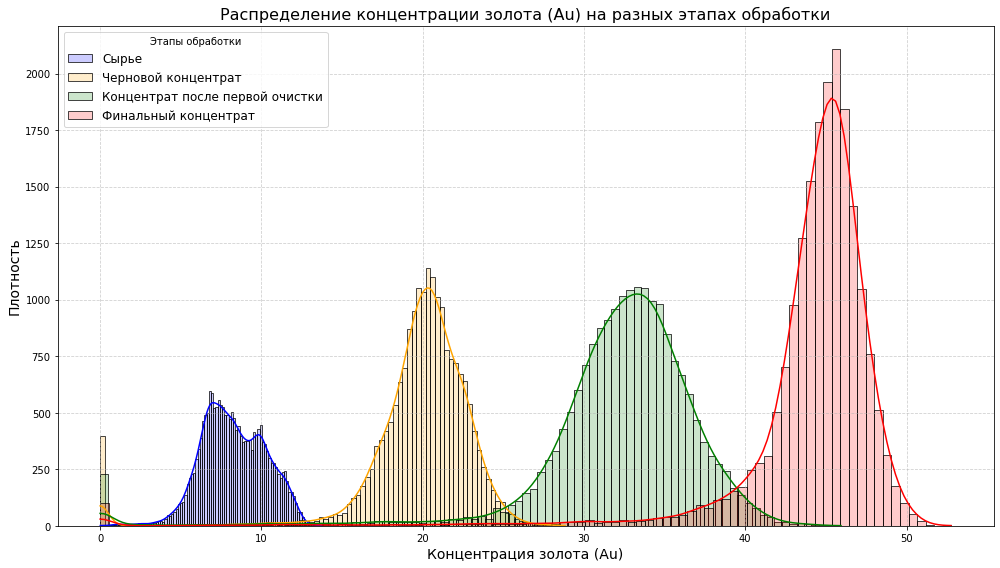

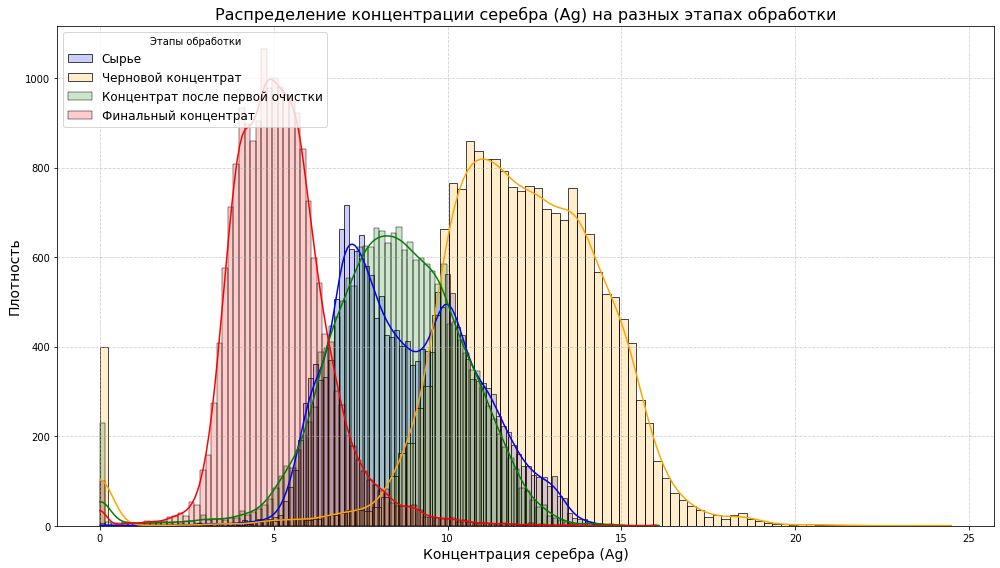

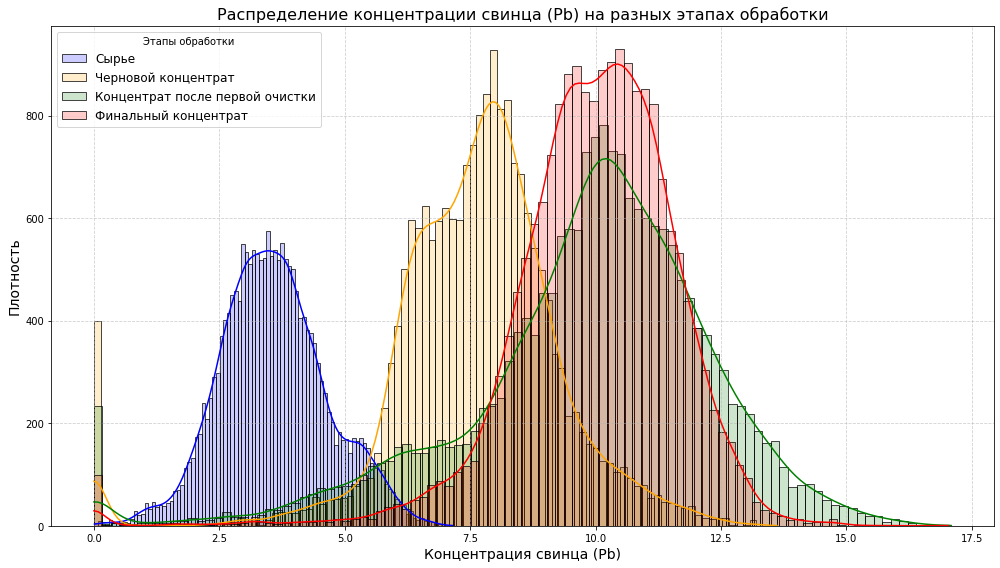

In [16]:
# Строим гистограммы для каждого металла с разными цветами
plot_concentration_distribution(concentration_au, 'золота (Au)')
plot_concentration_distribution(concentration_ag, 'серебра (Ag)')
plot_concentration_distribution(concentration_pb, 'свинца (Pb)')

In [17]:
# Создаем функцию для построения линейного графика
def plot_mean_concentration_line(au_data, ag_data, pb_data, stages):
    # Вычисляем средние значения
    au_mean = au_data.mean(axis=0)
    ag_mean = ag_data.mean(axis=0)
    pb_mean = pb_data.mean(axis=0)
    
    # Создаем график
    plt.figure(figsize=(12, 8))
    
    plt.plot(stages, ag_mean, marker='o', label='Серебро', color='blue')
    plt.plot(stages, pb_mean, marker='o', label='Свинец', color='orange')
    plt.plot(stages, au_mean, marker='o', label='Золото', color='green')
    
    plt.title('Изменение концентрации металлов на различных этапах обработки')
    plt.xlabel('Этапы обработки')
    plt.ylabel('Средняя концентрация')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()

# Этапы обработки
stages = ['Сырье', 'Черновой концентрат', 'Концентрат после первой очистки', 'Финальный концентрат']

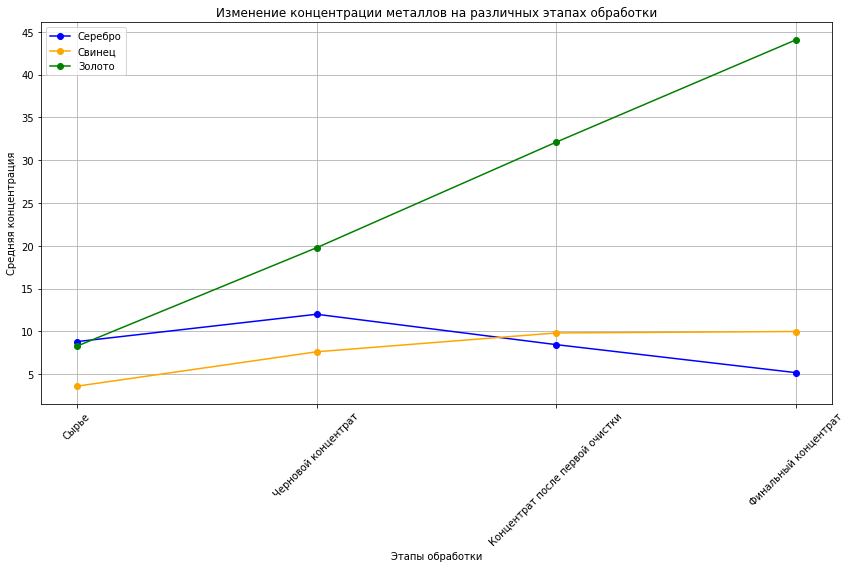

In [18]:
# Построение графика
plot_mean_concentration_line(concentration_au, concentration_ag, concentration_pb, stages)

**Вывод:**

1. **Золото (Au)**:
    - Концентрация золота значительно увеличивается на каждом этапе обработки, что свидетельствует о высокой эффективности процесса обогащения.
    - На каждом последующем этапе распределение становится более узким и сосредоточенным в более высоких значениях концентрации золота, что подтверждает успешное удаление примесей и повышение содержания золота в конечном продукте.

2. **Серебро (Ag)**:
    - На начальных этапах обработки концентрация серебра увеличивается, но на финальном этапе наблюдается значительное снижение.
    - Распределение концентрации серебра показывает, что процесс обогащения не приводит к значительному увеличению содержания серебра в конечном продукте, и даже приводит к его снижению на финальном этапе.
    - В отличие от золота, серебро не концентрируется так сильно в процессе обработки, и его содержание в финальном продукте оказывается ниже, чем на промежуточных этапах.

3. **Свинец (Pb)**:
   - В финальном концентрате распределение свинца остается практически таким же, как и на этапе концентрата после первой очистки, что указывает на то, что процесс финальной очистки не значительно изменяет концентрацию свинца.
   - Основной пик концентрации свинца также находится около 10 единиц.
   
Также обнаружено, что большинство аномалий находятся на этапе черновой очистки, где наблюдается значительное количество нулевых или близких к нулю значений. В то время как на этапе подачи сырья аномалии практически отсутствуют, и на финальном этапе концентрации аномалий меньше, чем на этапе черновой очистки. Исходя из этого, было решено удалить эти аномальные значения. Это важный шаг, поскольку такие аномалии могут оказать влияние на конечные расчетные характеристики, и их удаление способствует более точным результатам анализа.

**Линейный график:**
   - Процесс обогащения золота эффективен и приводит к значительному увеличению концентрации золота на каждом этапе обработки.
   - Концентрация серебра уменьшается на каждом этапе обработки, что может указывать на потерю серебра в процессе обогащения.
   - Концентрация свинца изменяется незначительно на каждом этапе, показывая некоторое увеличение на промежуточных этапах и незначительное уменьшение в финальном концентрате.

### Удаляем аномалии из тренировочной выборки

In [19]:
# Создаем список столбцов для проверки
columns_to_check = [
    'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au',
    'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au',
    'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au',
    'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au'
]

# Функция для удаления аномалий из тренировочной выборки
def remove_anomalies(df, columns):
    existing_columns = [col for col in columns if col in df.columns]
    if existing_columns:
        df = df[(df[existing_columns] > 1).all(axis=1)]
    return df

In [20]:
# Удаляем аномалии из тренировочной и полной выборки
train_data = remove_anomalies(train_data, columns_to_check)
full_data = remove_anomalies(full_data, columns_to_check)

# Проверяем размер тренировочной и полной выборки после удаления аномалий
print("Размер тренировочной выборки после удаления аномалий:", train_data.shape)
print("Размер полной выборки после удаления аномалий:", full_data.shape)

Размер тренировочной выборки после удаления аномалий: (13659, 87)
Размер полной выборки после удаления аномалий: (18433, 87)


### Сравним распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Параметр stat в функции sns.histplot() библиотеки Seaborn позволяет управлять тем, как значения данных интерпретируются при построении гистограммы. Одним из допустимых значений этого параметра является stat='density'.

Когда stat='density', гистограмма строится в нормализованном виде.

In [21]:
# Функция для построения гистограммы распределения размеров гранул исходного сырья
def plot_feed_size_distribution(train_df, test_df):
    plt.figure(figsize=(12, 6))
    sns.histplot(train_df['rougher.input.feed_size'], bins=50, kde=True, color='blue', label='Обучающая выборка', stat='density')
    sns.histplot(test_df['rougher.input.feed_size'], bins=50, kde=True, color='orange', label='Тестовая выборка', stat='density')
    
    plt.xlim(0, 200)
    plt.title('Распределение размеров гранул исходного сырья')
    plt.xlabel('Размер гранул исходного сырья')
    plt.ylabel('Плотность')
    plt.legend()
    plt.grid(True)
    plt.show()

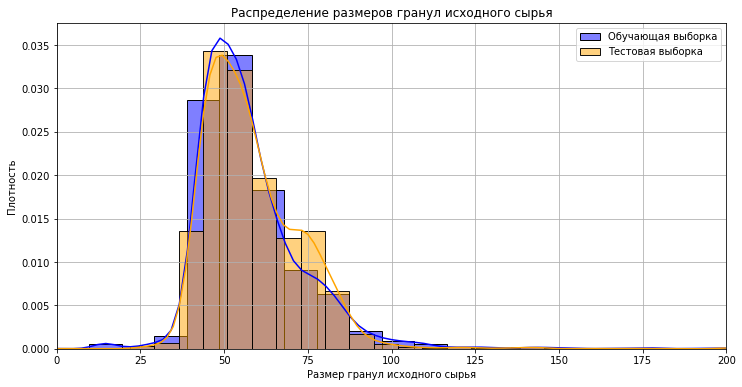

In [22]:
# Построение гистограмм
plot_feed_size_distribution(train_data, test_data)

**Вывод:**

Распределения размеров гранул исходного сырья в обучающей и тестовой выборках достаточно схожи. Это указывает на то, что модель, обученная на данных обучающей выборки, должна быть адекватно оценена на тестовой выборке.

### Проверка гипотез

Сформулируем гипотезы:

``Нулевая гипотеза (H0)``: Средние значения размеров гранул исходного сырья в обучающей и тестовой выборках равны.  
``Альтернативная гипотеза (H1)``: Средние значения размеров гранул исходного сырья в обучающей и тестовой выборках различаются.  

In [23]:
# Извлечение данных о размерах гранул исходного сырья
train_feed_size = train_data['rougher.input.feed_size']
test_feed_size = test_data['rougher.input.feed_size']

# Применение t-теста для независимых выборок
t_stat, p_value = st.ttest_ind(train_feed_size, test_feed_size, equal_var=False)

# Вывод результатов
print(f"t-статистика: {t_stat:.2f}")
print(f"p-значение: {p_value:.5f}")

# Вывод решения о гипотезах
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу (H0). Средние значения размеров гранул исходного сырья в обучающей и тестовой выборках различаются.")
else:
    print("Не удается отвергнуть нулевую гипотезу (H0). Средние значения размеров гранул исходного сырья в обучающей и тестовой выборках схожи.")

t-статистика: -1.37
p-значение: 0.17036
Не удается отвергнуть нулевую гипотезу (H0). Средние значения размеров гранул исходного сырья в обучающей и тестовой выборках схожи.


**Вывод:**

В результате анализа распределений размеров гранул исходного сырья на обучающей и тестовой выборках было проведено сравнение с использованием нормированных гистограмм и статистического теста t-тест. Полученные результаты говорят о том, что средние значения размеров гранул схожи между обучающей и тестовой выборками. Следовательно, отсутствуют значительные отличия в распределениях размеров гранул исходного сырья между этими двумя выборками.

Это важное наблюдение, так как различия в распределениях могли бы повлиять на корректность оценки модели. Теперь можно продолжать анализ и обучение модели с уверенностью в схожести данных в этом аспекте.

### Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

In [24]:
full_data['feed_sum'] = full_data[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1)
full_data['rougher_output_sum'] = full_data[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']].sum(axis=1)
full_data['primary_cleaner_output_sum'] = full_data[['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb']].sum(axis=1)
full_data['final_output_sum'] = full_data[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']].sum(axis=1)

In [25]:
# Функция для построения гистограмм распределения суммарной концентрации металлов на разных стадиях
def plot_concentration_sums(df):
    plt.figure(figsize=(10, 6))
    
    stages = ['feed_sum', 'rougher_output_sum', 'primary_cleaner_output_sum', 'final_output_sum']
    labels = ['Сырье', 'Черновой концентрат', 'Концентрат после первой очистки', 'Финальный концентрат']
    colors = ['blue', 'orange', 'green', 'red']
    
    for stage, label, color in zip(stages, labels, colors):
        sns.histplot(df[stage], kde=True, label=label, color=color, bins=50, alpha=0.6)
    
    plt.title('Распределение суммарной концентрации металлов на разных стадиях')
    plt.xlabel('Суммарная концентрация металлов')
    plt.ylabel('Плотность')
    plt.legend(title='Стадии обработки')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

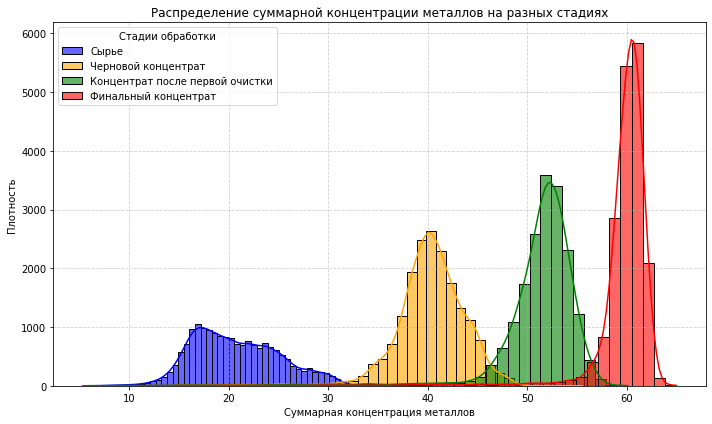

In [26]:
# Построение гистограмм
plot_concentration_sums(full_data)

**Вывод:**

- Процесс обогащения руды показывает постепенное и значительное увеличение концентрации металлов на каждом из этапов.
- Концентрация металлов (Au, Ag, Pb) эффективно повышается от исходного сырья до финального продукта.
- Распределение данных на каждом этапе выглядит адекватно, без явных аномалий или выбросов, что свидетельствует о стабильности и надежности процесса обогащения.

## Построим модель
### Напишим функцию для вычисления итоговой sMAPE

sMAPE (симметричное среднее абсолютное процентное отклонение) используется для оценки точности моделей прогнозирования, особенно когда значения предсказанных и фактических величин могут быть равны нулю или близки к нему. 

sMAPE вычисляется как среднее абсолютных процентных ошибок для каждой пары предсказанных и фактических значений, что позволяет учитывать их абсолютные значения. Формула для расчета sMAPE выглядит следующим образом:

$$
\text{sMAPE} = \frac{1}{N} \sum_{i=1}^{N} \frac{| y_i - \hat{y}_i |}{(| y_i | + | \hat{y}_i |) / 2} \times 100\% 
$$
Где:

- $ y_i $ — истинное значение целевого признака для объекта с порядковым номером $ i $ в выборке.
- $ \hat{y}_i $ — предсказанное значение для объекта с порядковым номером $ i $.
- $ N $ — количество объектов в выборке.

Итоговая метрика складывается из двух величин:

$$
\text{Итоговое sMAPE} = 25\% \times \text{sMAPE(rougher)} + 75\% \times \text{sMAPE(final)}
$$

In [27]:
def smape(y_true, y_pred):
    """
    Вычисляет симметричное среднее абсолютное процентное отклонение (sMAPE).

    :param y_true: истинные значения целевого признака
    :param y_pred: предсказанные значения
    :return: значение метрики sMAPE
    """
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    smape_value = np.mean(numerator / denominator) * 100
    return smape_value

In [28]:
def final_smape(smape_rougher, smape_final):
    return (0.25 * smape_rougher) + (0.75 * smape_final)

###  Обучим разные модели и оцените их качество кросс-валидацией

In [29]:
# Удаляем столбец 'date' из данных
train_data = train_data.drop('date', axis=1)
test_data = test_data.drop('date', axis=1)

Даты не нужны для обучения модели, потому что они не помогают предсказать целевые переменные.

In [30]:
# Создаем список столбцов, которые необходимо исключить на основе определенных критериев
patterns_to_exclude = ['output.recovery', 'output.concentrate', 'output.tail', 'calculation', 'ratio']
features_to_exclude = [col for col in train_data.columns if any(pattern in col for pattern in patterns_to_exclude)]

Столбцы с ``output.recovery`` содержат целевые переменные, и их не следует использовать в качестве признаков для обучения модели.

Столбцы с ``output.concentrate`` или ``output.tail``представляют выходные данные на различных этапах обработки и также не должны быть использованы в качестве признаков.

Столбцы с ``calculation`` и ``ratio`` содержат рассчитанные значения, которые могут быть получены из других признаков и поэтому могут создавать утечки данных при обучении модели.

In [31]:
# Выделяем признаки и целевые переменные для грубой очистки и финального продукта
features_train_rougher = train_data.drop(features_to_exclude, axis=1).values
target_train_rougher = train_data['rougher.output.recovery'].values

features_train_final = train_data.drop(features_to_exclude, axis=1).values
target_train_final = train_data['final.output.recovery'].values

# Получение признаков и целевых переменных для тестовой выборки грубой очистки и финального продукта (для проверки на финальном этапе)
features_test = np.array(test_data.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1))
target_test_rougher = np.array(test_data['rougher.output.recovery'])
target_test_final = np.array(test_data['final.output.recovery'])

# Выводим размерности массивов для грубой очистки
print("Грубая очистка:")
print("Признаки:", features_train_rougher.shape)
print("Целевая переменная (грубая очистка):", target_train_rougher.shape)

# Выводим размерности массивов для финального продукта
print("Финальный продукт:")
print("Признаки:", features_train_final.shape)
print("Целевая переменная (финальный продукт):", target_train_final.shape)

Грубая очистка:
Признаки: (13659, 52)
Целевая переменная (грубая очистка): (13659,)
Финальный продукт:
Признаки: (13659, 52)
Целевая переменная (финальный продукт): (13659,)


Это функция из библиотеки scikit-learn (sklearn), которая позволяет создавать пользовательские оценщики (scorers). Оценщики используются для измерения производительности моделей, и они могут быть стандартными метриками, такими как среднеквадратичная ошибка (MSE), средняя абсолютная ошибка (MAE), или пользовательские метрики, такие как sMAPE (симметричное среднее абсолютное процентное отклонение).

greater_is_better = False: Этот аргумент указывает, что меньшие значения sMAPE лучше.

In [32]:
smape_scorer = make_scorer(smape, greater_is_better=False)

In [33]:
# Определяем модели и их параметры
models = {
    'Decision Tree': (DecisionTreeRegressor(random_state=RANDOM_STATE), {
        'model__max_depth': [10, 25, 50, 100],
        'model__min_samples_split': [2, 5, 10, 15],
        'model__min_samples_leaf': [1, 2, 4, 6]
    }),
    'Random Forest': (RandomForestRegressor(random_state=RANDOM_STATE), {
        'model__n_estimators': [10, 50],  
        'model__max_depth': [5, 10],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    }),
    'Linear Regression': (LinearRegression(), {
        'model__fit_intercept': [True, False],
    }),
    'Lasso': (Lasso(random_state=RANDOM_STATE, max_iter=10000), {
        'model__alpha': [0.001, 0.01, 0.1, 1.0]
    })
}

In [34]:
# Функция для обучения и оценки моделей
def train_and_evaluate(models, X, y):
    results = {}
    for name, (model, params) in models.items():
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
        grid_search = GridSearchCV(pipeline, param_grid=params, scoring=smape_scorer, cv=5)
        grid_search.fit(X, y)
        best_model = grid_search.best_estimator_
        best_score = -grid_search.best_score_  # Инвертируем значение метрики
        results[name] = {
            'best_model': best_model,
            'best_score': best_score,  # Сохраняем положительное значение sMAPE
            'best_params': grid_search.best_params_
        }
        print('-'*50)
        print(f"{name} - Best sMAPE score: {best_score}")
        print(f"{name} - Best params: {grid_search.best_params_}\n")
    return results

In [35]:
# Обучение и оценка моделей для грубой очистки
print("Грубая очистка:")
results_rougher = train_and_evaluate(models, features_train_rougher, target_train_rougher)

Грубая очистка:
--------------------------------------------------
Decision Tree - Best sMAPE score: 7.97607460561588
Decision Tree - Best params: {'model__max_depth': 10, 'model__min_samples_leaf': 6, 'model__min_samples_split': 2}

--------------------------------------------------
Random Forest - Best sMAPE score: 6.352977945436034
Random Forest - Best params: {'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 50}

--------------------------------------------------
Linear Regression - Best sMAPE score: 6.983763825445644
Linear Regression - Best params: {'model__fit_intercept': True}

--------------------------------------------------
Lasso - Best sMAPE score: 6.215731746077584
Lasso - Best params: {'model__alpha': 1.0}



In [36]:
# Обучение и оценка моделей для финального продукта
print("Финальный продукт:")
results_final = train_and_evaluate(models, features_train_final, target_train_final)

Финальный продукт:
--------------------------------------------------
Decision Tree - Best sMAPE score: 10.904332633619218
Decision Tree - Best params: {'model__max_depth': 10, 'model__min_samples_leaf': 6, 'model__min_samples_split': 15}

--------------------------------------------------
Random Forest - Best sMAPE score: 8.944194292823784
Random Forest - Best params: {'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10, 'model__n_estimators': 50}

--------------------------------------------------
Linear Regression - Best sMAPE score: 9.294764204369823
Linear Regression - Best params: {'model__fit_intercept': True}

--------------------------------------------------
Lasso - Best sMAPE score: 8.564919508513109
Lasso - Best params: {'model__alpha': 1.0}



In [37]:
# Расчет финального sMAPE для каждой модели
final_smape_scores = {}
for model_name in results_rougher.keys():
    smape_rougher = results_rougher[model_name]['best_score']
    smape_final = results_final[model_name]['best_score']
    final_smape_value = final_smape(smape_rougher, smape_final)
    final_smape_scores[model_name] = final_smape_value
    print(f'по модели {model_name} итоговое sMAPE = {final_smape_value:.2f}')

# Выбор модели с наименьшим значением sMAPE
best_model_name = min(final_smape_scores, key=final_smape_scores.get)
print('-'*50)
print(f'Лучшая модель: {best_model_name} с итоговым sMAPE = {final_smape_scores[best_model_name]:.2f}')

# Получение лучших моделей из результатов
best_model_rougher = results_rougher[best_model_name]['best_model']
best_model_final = results_final[best_model_name]['best_model']

по модели Decision Tree итоговое sMAPE = 10.17
по модели Random Forest итоговое sMAPE = 8.30
по модели Linear Regression итоговое sMAPE = 8.72
по модели Lasso итоговое sMAPE = 7.98
--------------------------------------------------
Лучшая модель: Lasso с итоговым sMAPE = 7.98


**Вывод по лучшей модели:**

- **Грубая очистка**: Модель Lasso с sMAPE 6.215 является лучшей на этом этапе. Параметр `alpha` в 1.0 обеспечивает оптимальную регуляризацию.  

- **Финальный продукт**: Модель Lasso с sMAPE 8.56 также является лучшей на этом этапе. Это подтверждает эффективность Lasso для задач на различных этапах обработки данных.  

- Финальный sMAPE модели Lasso: 7.98

### Проверим модель на тестовой выборке

In [38]:
# Предсказание целевых переменных на тестовой выборке
pred_test_rougher = best_model_rougher.predict(features_test)
pred_test_final = best_model_final.predict(features_test)

# Вычисление sMAPE для тестовой выборки
smape_rougher_test = smape(target_test_rougher, pred_test_rougher)
smape_final_test = smape(target_test_final, pred_test_final)


# Расчет и вывод финального sMAPE для тестовой выборки
final_smape_test = final_smape(smape_rougher_test, smape_final_test)
print(f'Итоговое sMAPE модели Lasso на тестовой выборке: {final_smape_test:.3f}')

Итоговое sMAPE модели Lasso на тестовой выборке: 7.406


### Проверим модель на адекватность

In [39]:
# Создаем константную модель, предсказывающую среднее значение тренировочной выборки для грубой очистки
dummy_rougher = DummyRegressor(strategy='mean')
dummy_rougher.fit(features_train_rougher, target_train_rougher)

# Создаем константную модель, предсказывающую среднее значение тренировочной выборки для финального продукта
dummy_final = DummyRegressor(strategy='mean')
dummy_final.fit(features_train_final, target_train_final)

# Предсказываем с константными моделями
dummy_predictions_rougher = dummy_rougher.predict(features_test)
dummy_predictions_final = dummy_final.predict(features_test)

# Вычисляем sMAPE для константных моделей
dummy_smape_rougher = smape(target_test_rougher, dummy_predictions_rougher)
dummy_smape_final = smape(target_test_final, dummy_predictions_final)

# Вычисляем final_sMAPE для константной модели
dummy_final_smape_test = final_smape(dummy_smape_rougher, dummy_smape_final)

print('sMAPE для константной модели:', dummy_final_smape_test)

sMAPE для константной модели: 8.433008779825085


## Общий вывод

В рамках данного проекта было выполнено исследование и разработка модели для оптимизации процессов обработки руды на предприятии. Главной задачей было предсказание коэффициента восстановления золота из золотосодержащей руды на двух этапах: грубой и финальной очистки. Для этого были проанализированы и предобработаны данные, построены и обучены модели машинного обучения, и затем проведена оценка качества моделей на тестовой выборке.

Исходя из метрики симметричной средней абсолютной процентной ошибки (sMAPE), лучшей моделью для предсказания коэффициента восстановления золота оказалась модель LASSO с полученным sMAPE равным 7.40 на тестовой выборке. Это позволяет сделать вывод о том, что данная модель обладает наилучшей точностью в предсказании процесса обогащения золотосодержащей руды.